# Thông tin sinh viên

- MSSV: 19120688
- Họ và tên: Đỗ Nhật Toàn

# Chuẩn bị

## Import các thư viện

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Test data

In [3]:
data = pd.read_csv('./ToyotaCorolla.csv', header=0)
data = data.dropna()

In [4]:
data.shape

(1436, 12)

In [5]:
data.head()

,Price,Age,Kilometers,Fuel_Type,HP,Metallic,Color,Automatic,CC,Doors,Quarterly_Tax,Weight
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,210,1170


# Hãy trực quan hóa các thông tin thống kê mô tả cho các biến

## Khai báo danh sách thuộc tính

In [6]:
atr_list = ['Price', 'Age', 'Kilometers', 'Fuel_Type', 'HP', 'Metallic', 'Color', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
numeric_list = ['Price', 'Age', 'HP', 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
categorical_list = ['Fuel_Type', 'Metallic', 'Automatic', 'Color']

## Biểu đồ box plot thể hiện thông tin thống kê mô tả của các thuộc tính numeric

Descriptive statistics information of Price
count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64


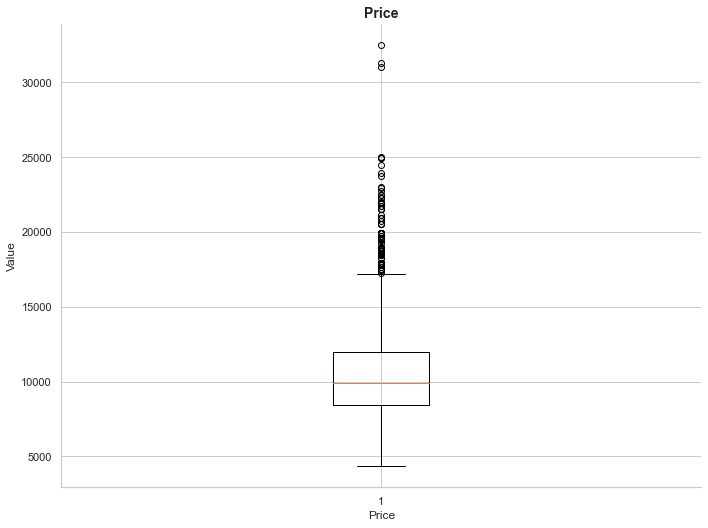

Descriptive statistics information of Age
count    1436.000000
mean       55.947075
std        18.599988
min         1.000000
25%        44.000000
50%        61.000000
75%        70.000000
max        80.000000
Name: Age, dtype: float64


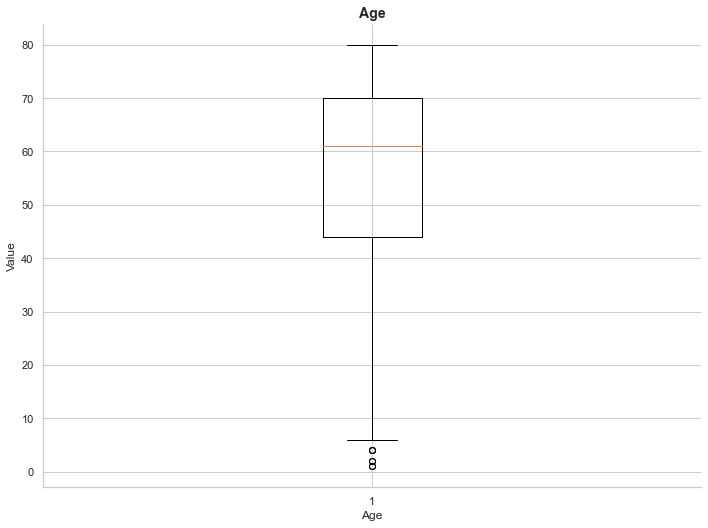

Descriptive statistics information of HP
count    1436.000000
mean      101.502089
std        14.981080
min        69.000000
25%        90.000000
50%       110.000000
75%       110.000000
max       192.000000
Name: HP, dtype: float64


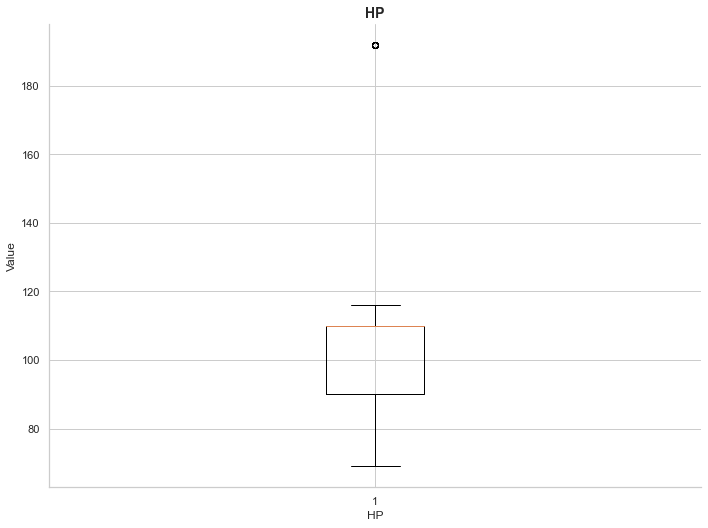

Descriptive statistics information of CC
count     1436.00000
mean      1576.85585
std        424.38677
min       1300.00000
25%       1400.00000
50%       1600.00000
75%       1600.00000
max      16000.00000
Name: CC, dtype: float64


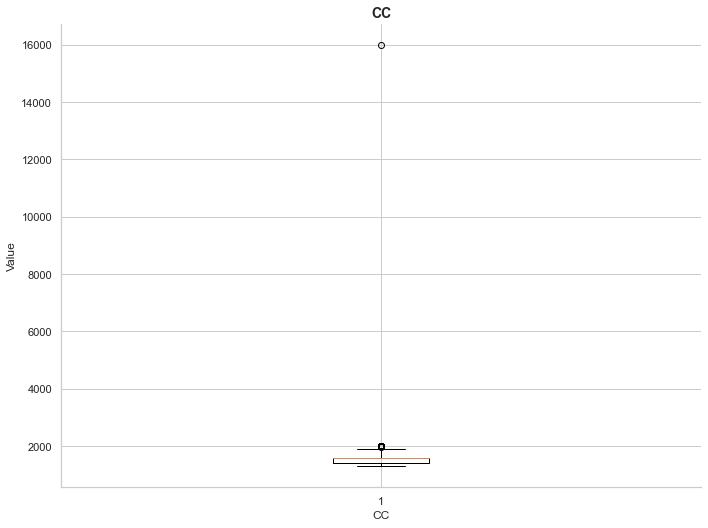

Descriptive statistics information of Doors
count    1436.000000
mean        4.033426
std         0.952677
min         2.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Doors, dtype: float64


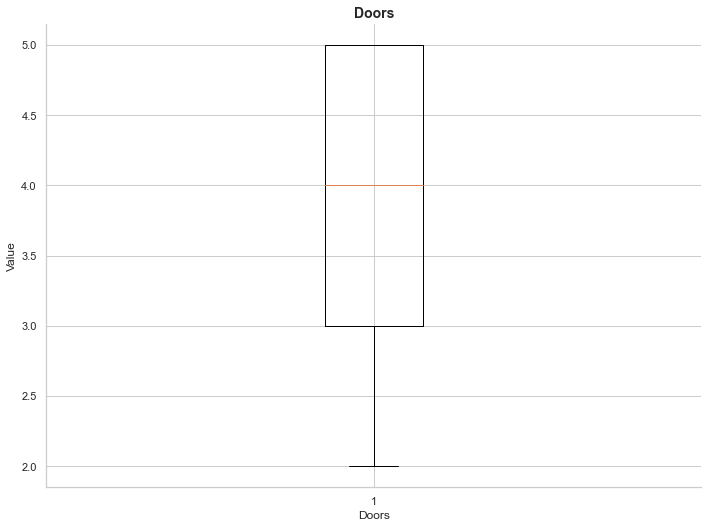

Descriptive statistics information of Quarterly_Tax
count    1436.000000
mean       87.122563
std        41.128611
min        19.000000
25%        69.000000
50%        85.000000
75%        85.000000
max       283.000000
Name: Quarterly_Tax, dtype: float64


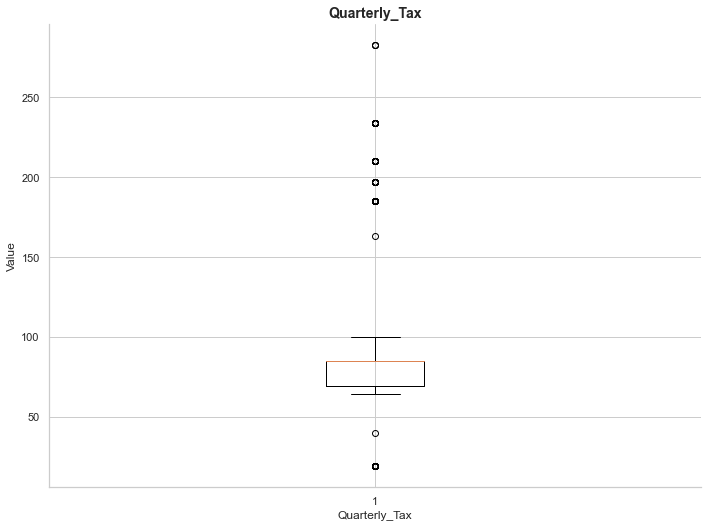

Descriptive statistics information of Weight
count    1436.00000
mean     1072.45961
std        52.64112
min      1000.00000
25%      1040.00000
50%      1070.00000
75%      1085.00000
max      1615.00000
Name: Weight, dtype: float64


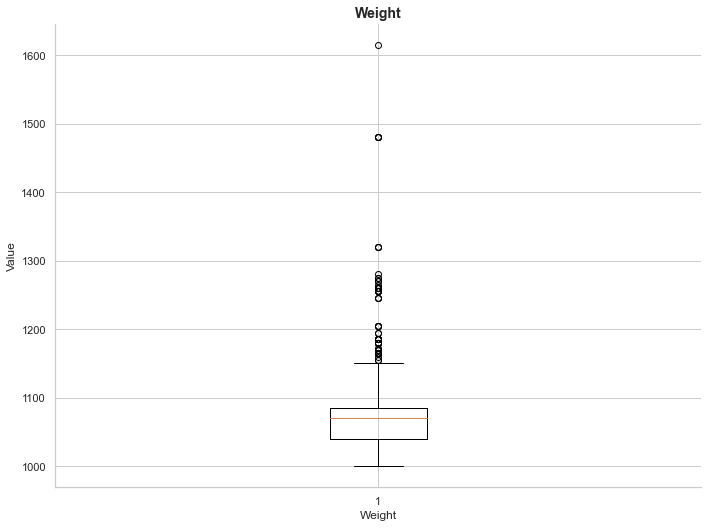

In [7]:
for x in numeric_list:
    print("Descriptive statistics information of", x)
    print(data[x].describe())
    fig_obj = plt.figure(figsize=(10, 7.5))
    ax = plt.subplot(111)
    ax.spines["bottom"].set_visible(True) 
    ax.spines["left"].set_visible(True)    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    p = plt.boxplot(data[x])
    plt.title(x, fontsize=14, fontweight='bold')
    plt.xlabel(x)
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()

**Nhận xét**: Nhìn chung, có một số biểu đồ có khá nhiều điểm outline như biểu đồ Price và Weight. Ngoài ra, một số biểu đồ bị dồn về một phía như HP, CC, Tax. Điều đó cho thấy bộ dữ liệu khá mất cân bằng.

## Biểu đồ pie chart thể hiện thông tin của các thuộc tính categorical

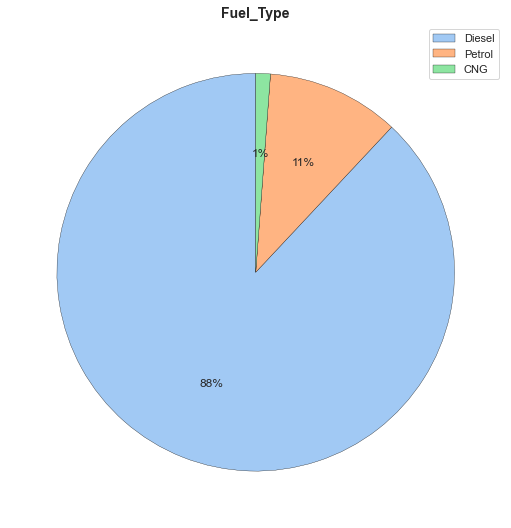

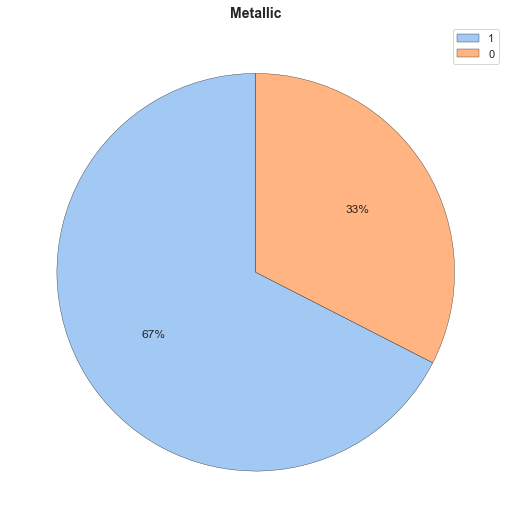

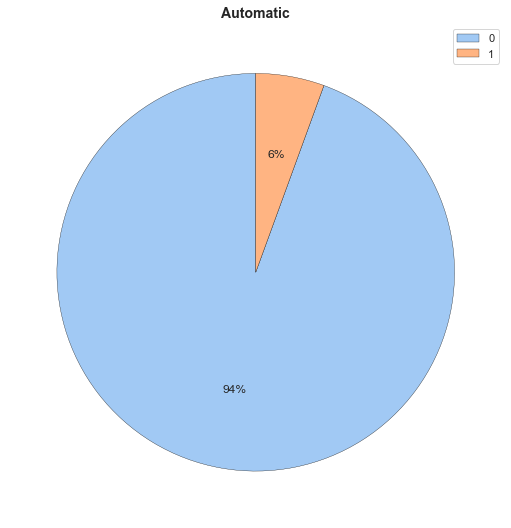

In [8]:
colors = sns.color_palette('pastel')
for x in categorical_list[:-1]:
    fig_obj = plt.figure(figsize=(10, 7.5))
    fig_obj.set_facecolor('white')
    value = data[x].value_counts()
    label = data[x].unique().tolist()  
    ax = plt.subplot(111)
    plt.title(x, fontsize=14, fontweight='bold')
    plt.pie(value, colors=colors,autopct='%.0f%%', startangle=90, wedgeprops = {"edgecolor" : "black",
                        'linewidth': 0.3,
                        'antialiased': True})
    plt.legend(label,loc=1)
    plt.tight_layout()
    plt.show()

**Nhận xét:**
- Dựa vào biểu đồ cho thấy có tới 88% xe sử dụng nhiên liệu Diesel, 11% sử dụng nhiên liệu Petrol, 1% sử dụng nhiên liệu CNG. Một phần vì nhiên liệu Diesel rẻ hơn và thông dụng hơn so với 2 loại nhiên liệu còn lai. Riêng nhiên liệu CNG (khí nén thiên nhiên) có tỷ trọng khá ít cho thấy công ty vẫn chưa tập trung nhiều vào việc môi trường
- Đối với biến Metallic có tới 2/3 có sử dụng màu metallic vì sẽ giúp xe đẹp hơn cũng như ít bám bụi so với xe không sử dụng.
- Về biến Automatic thì vẫn chưa có nhiều xe có chức năng lái xe tự động vì chỉ chiếm 6% trên tổng số xe nhưng dự đoán trong tương lai thì con số này sẽ tăng dần do sự phát triển công nghệ.

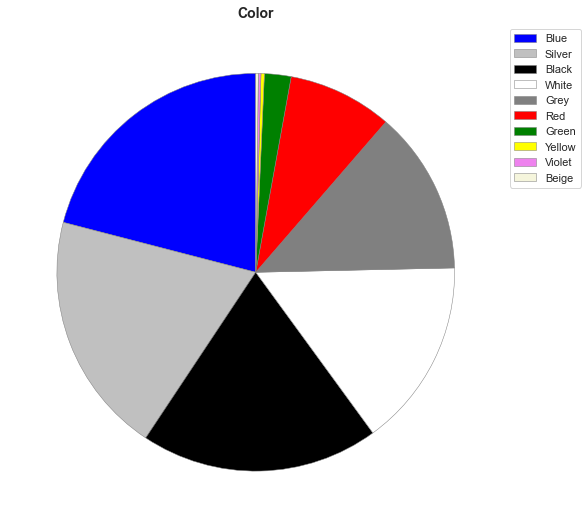

In [9]:
fig_obj = plt.figure(figsize=(10, 7.5))
fig_obj.set_facecolor('white')
value = data['Color'].value_counts()
label = data['Color'].unique().tolist()
ax = plt.subplot(111)
plt.title('Color', fontsize=14, fontweight='bold')
plt.pie(value, colors=label, startangle=90, wedgeprops = {"edgecolor" : "grey",
                      'linewidth': 0.5,
                      'antialiased': True})
plt.legend(label, bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

**Nhận xét:** Về biến Color thì phân bố khá đồng đều giữa các màu xe không quá nổi bật như các màu nằm trong thang xám. Một số màu ít phổ biến hơn thì thường khá nổi bật và lạ mắt như màu tím, màu be,...

# Tìm và trực quan mối quan hệ tương quan giữa các cặp biến (nếu có)

<AxesSubplot:>

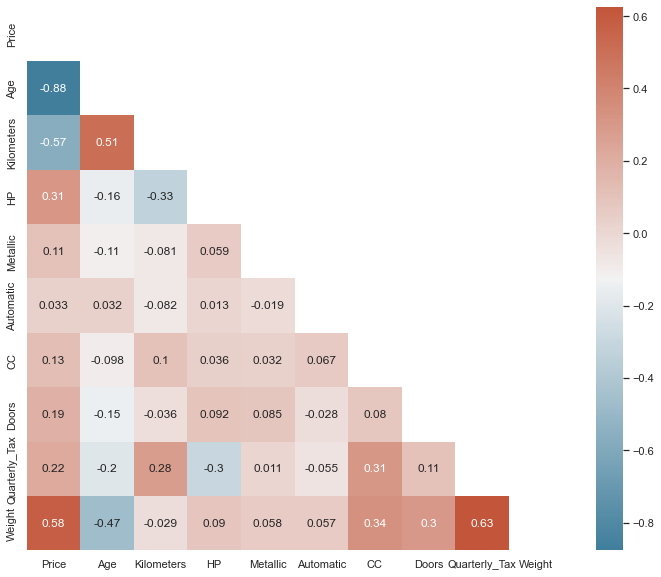

In [10]:
corr = data.corr(method="pearson")
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Weight vs. Quarterly_Tax

Correlation matrix:
 [[1.         0.62613373]
 [0.62613373 1.        ]]


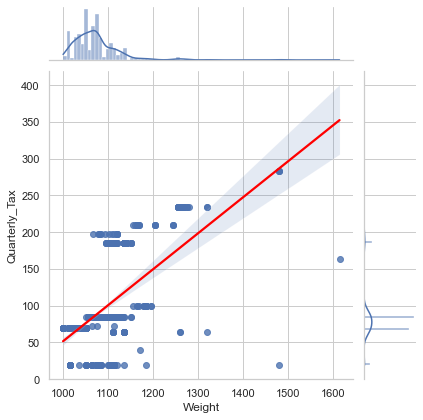

In [11]:
print("Correlation matrix:\n", np.corrcoef(data['Weight'], data['Quarterly_Tax']))
a = sns.jointplot(x="Weight",y="Quarterly_Tax", data=data, kind='reg')
regline = a.ax_joint.get_lines()[0]
regline.set_color('red')

**Nhận xét:** Dựa vào biểu đồ, ta thấy biến Weight càng tăng thì biến Quarterly_Tax càng tăng theo. Thực tế cho thấy xe có khối lượng càng tăng thì mức thuế sẽ tăng theo nên biến Quarterly_Tax sẽ phụ thuộc vào biến Weight. 

## Weight vs. Price

Correlation matrix:
 [[1.         0.58119759]
 [0.58119759 1.        ]]


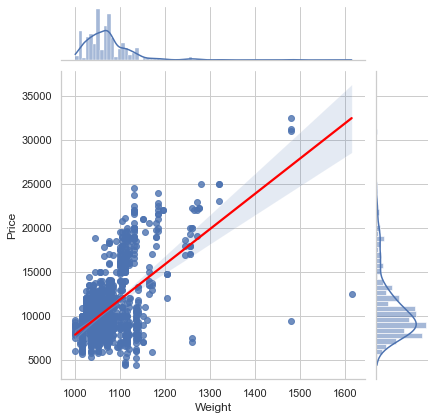

In [12]:
print("Correlation matrix:\n", np.corrcoef(data['Weight'], data['Price']))
b = sns.jointplot(x="Weight",y="Price", data=data, kind='reg')
regline = b.ax_joint.get_lines()[0]
regline.set_color('red')

**Nhận xét:** Dựa vào biểu đồ, ta thấy biến Weight càng tăng thì biến Price cũng sẽ tăng theo. 

## Age vs. Kilometers

Correlation matrix:
 [[1.         0.50567218]
 [0.50567218 1.        ]]


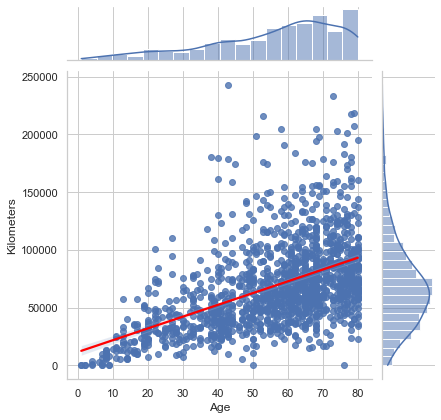

In [13]:
print("Correlation matrix:\n", np.corrcoef(data['Age'], data['Kilometers']))
c = sns.jointplot(x="Age",y="Kilometers", data=data, kind='reg')
regline = c.ax_joint.get_lines()[0]
regline.set_color('red')

**Nhận xét:** Dựa vào biểu đồ, ta thấy biến Age càng tăng thì biến Kilometers cũng sẽ tăng theo. Thực tế cho thấy những xe có tuổi thọ càng cao thì sẽ đi được nhiều kilomet hơn những xe có tuối thọ thấp.

## Age vs. Price

Correlation matrix:
 [[ 1.        -0.8765905]
 [-0.8765905  1.       ]]


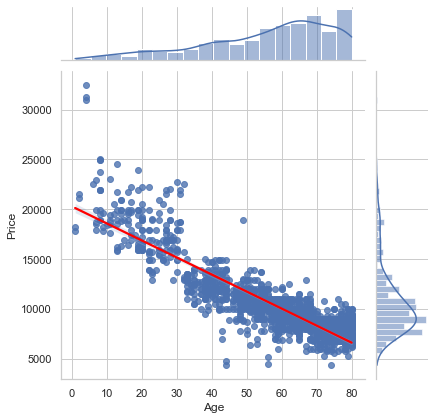

In [14]:
print("Correlation matrix:\n", np.corrcoef(data['Age'], data['Price']))
c = sns.jointplot(x="Age",y="Price", data=data, kind='reg')
regline = c.ax_joint.get_lines()[0]
regline.set_color('red')

**Nhận xét:** Dựa vào biểu đồ, ta thấy biến Age càng tăng thì biến Price càng giảm. Thực tế cho thấy những xe có tuổi thọ càng cao thì mức giá sẽ thấp hơn so với những xe mới sản xuất.

## Kilometers vs. Price

Correlation matrix:
 [[ 1.         -0.56996016]
 [-0.56996016  1.        ]]


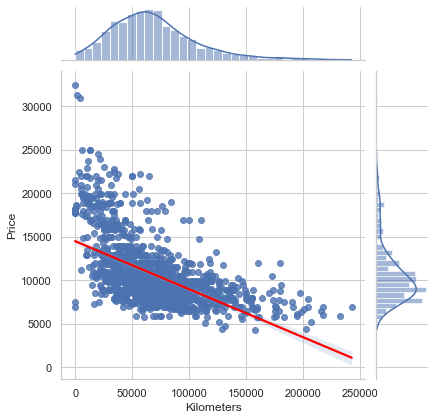

In [15]:
print("Correlation matrix:\n", np.corrcoef(data['Kilometers'], data['Price']))
c = sns.jointplot(x="Kilometers",y="Price", data=data, kind='reg')
regline = c.ax_joint.get_lines()[0]
regline.set_color('red')

**Nhận xét:** Biểu đồ này khá tương tự như biểu đồ Kilometers vs. Price

# Hãy trực quan hóa biểu đồ histogram cho `Price` theo từng biến biến theo `Fuel_type` và `Color`



## Price và Fuel_type

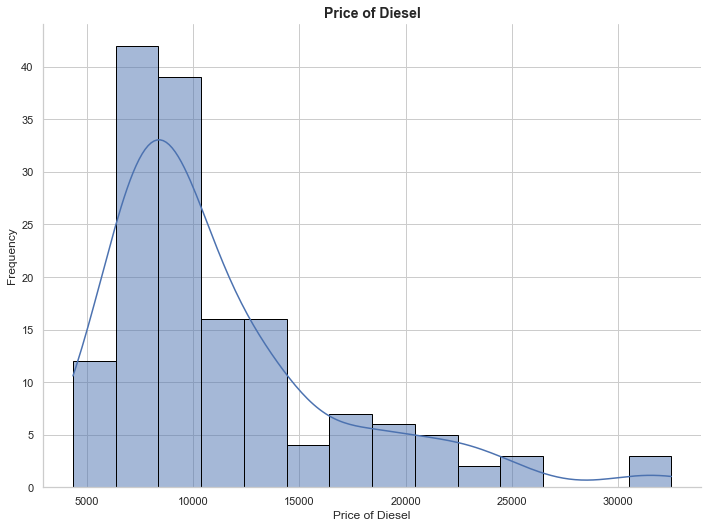

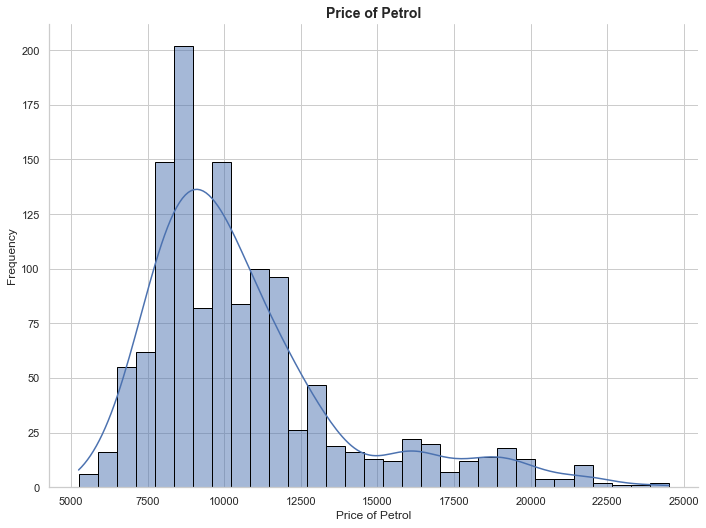

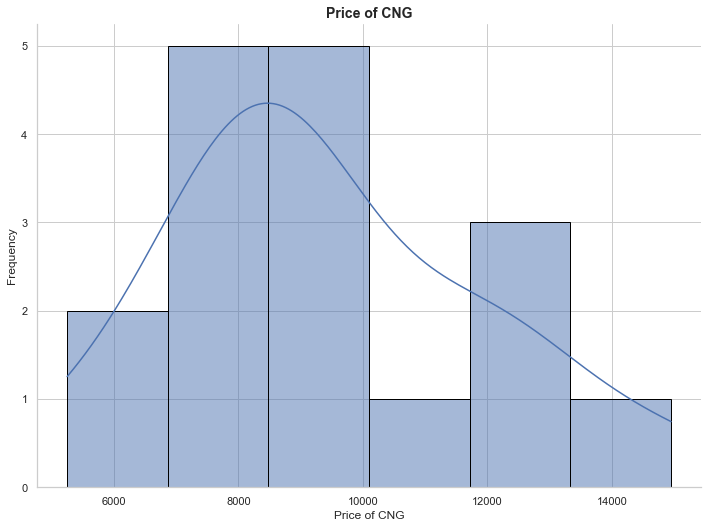

In [16]:
list_fuel_type = data.Fuel_Type.unique()
for x in list_fuel_type:
    temp = data[data["Fuel_Type"]==x]
    fig_obj = plt.figure(figsize=(10, 7.5))
    ax = plt.subplot(111)
    ax.spines["bottom"].set_visible(True)  # Set the spines, or box bounds visibility
    ax.spines["left"].set_visible(True)    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    sns.histplot(data=temp.Price, kde=True, edgecolor='black')
    plt.title("Price of "+ str(x), fontsize=14, fontweight='bold')
    plt.xlabel("Price of "+ str(x))
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

**Nhận xét:** Dựa vào biểu đồ, hầu như mức giá các xe ở tất cả các loại nhiên liệu đều phân bố nhiều ở mức 7500 - 12000 do nhu cầu của người dân phần lớn tập trung ở mức này

## Price và Colors

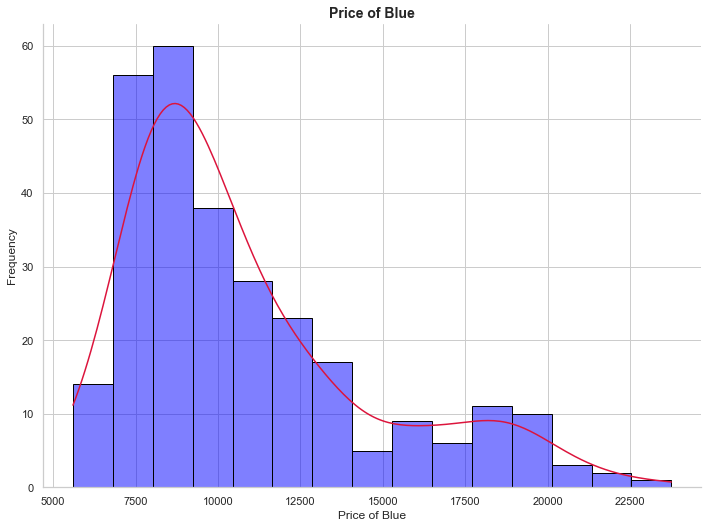

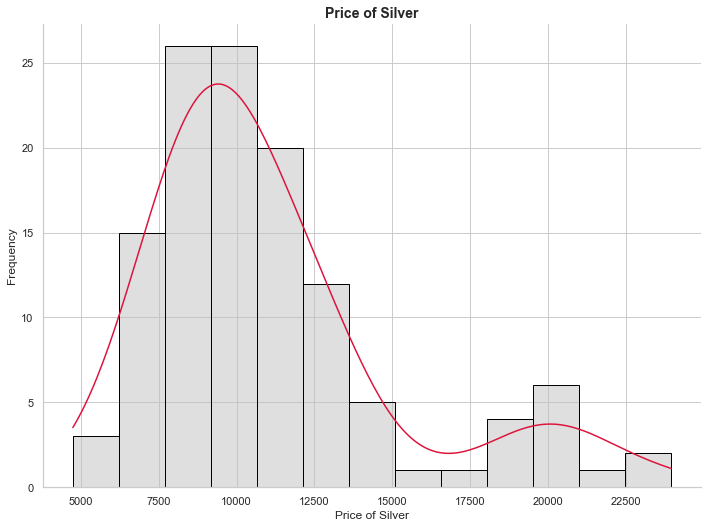

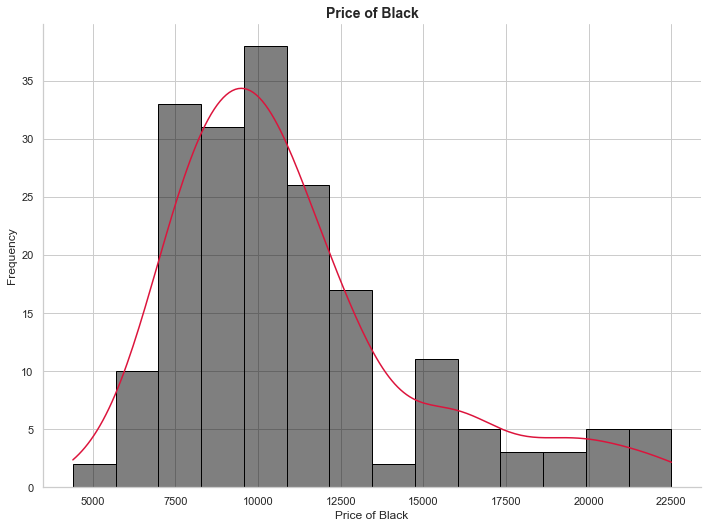

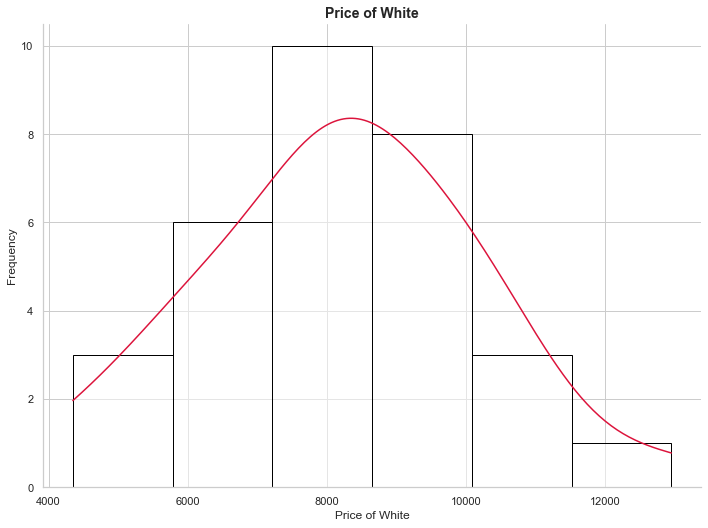

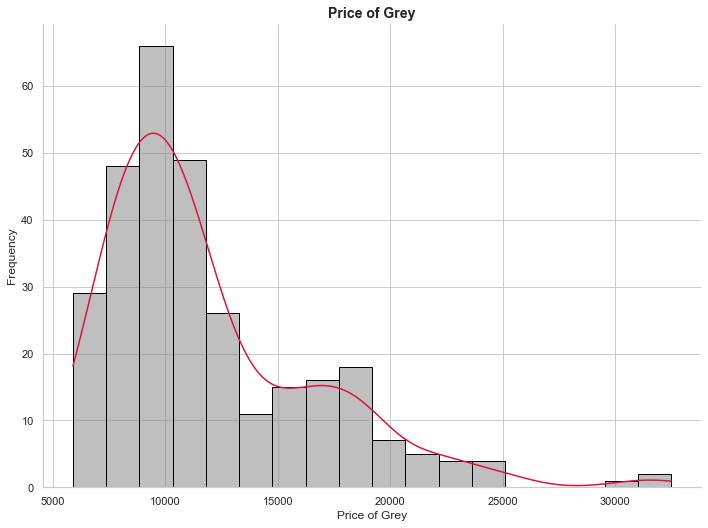

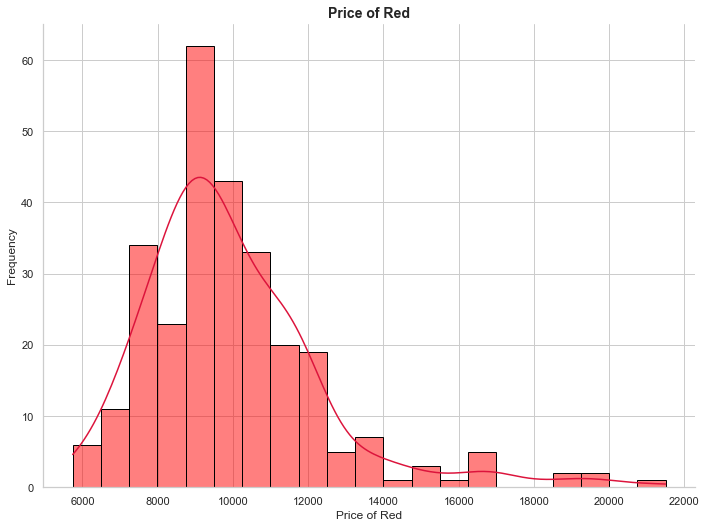

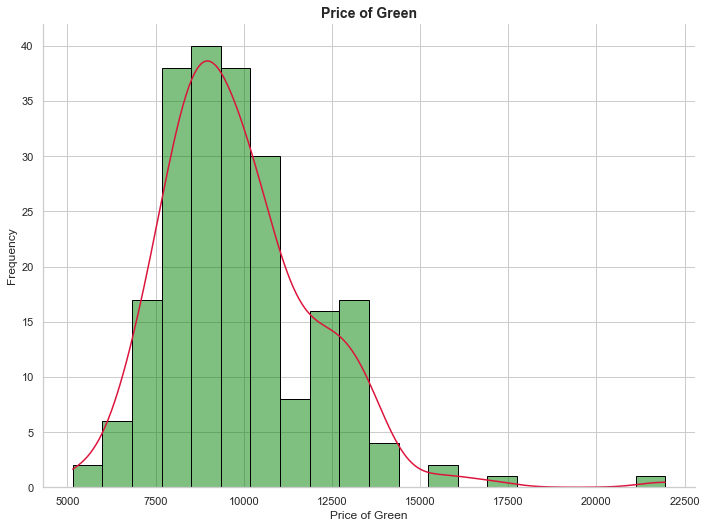

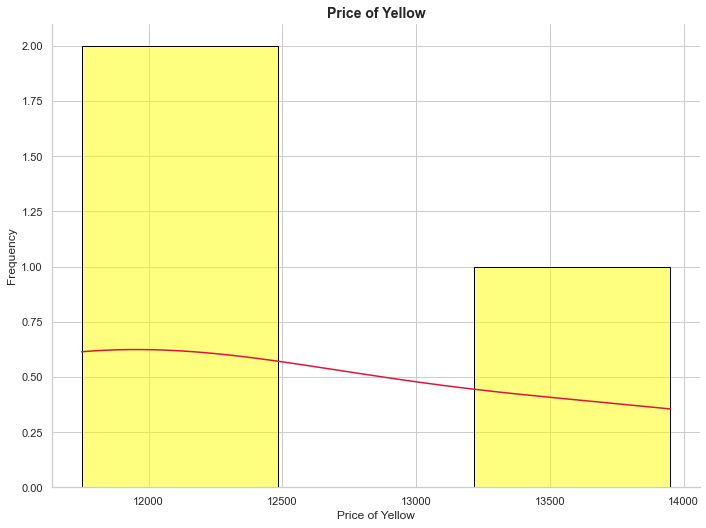

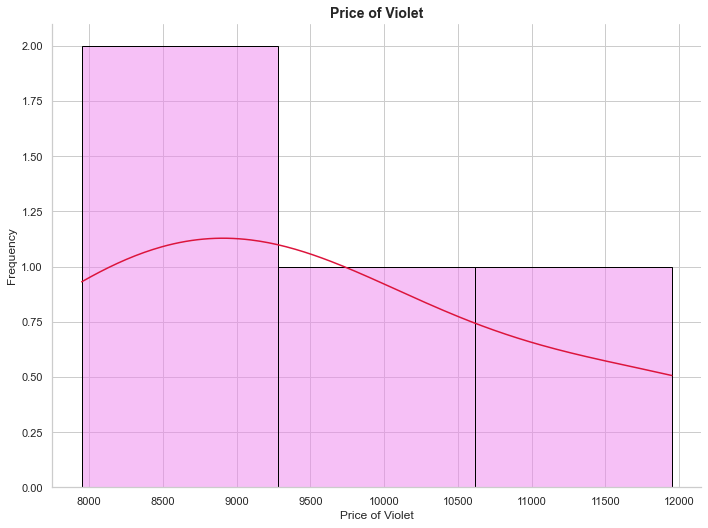

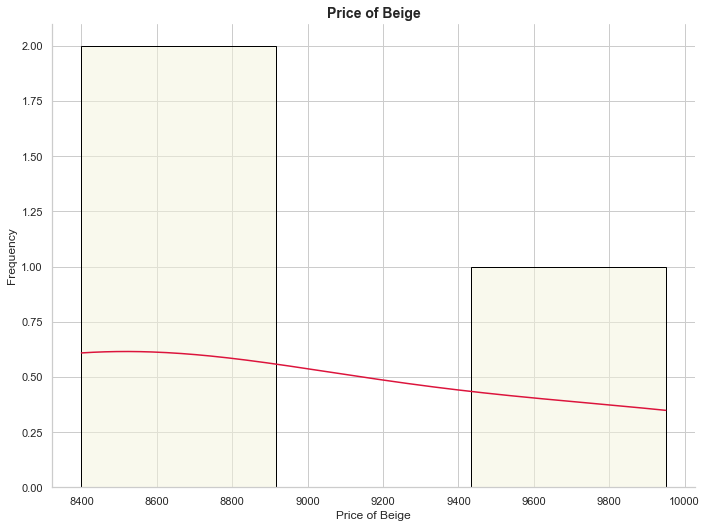

In [17]:
list_color = data.Color.unique()
for x in list_color:
    temp = data[data["Color"]==x]
    fig_obj = plt.figure(figsize=(10, 7.5))
    ax = plt.subplot(111)
    ax.spines["bottom"].set_visible(True)  # Set the spines, or box bounds visibility
    ax.spines["left"].set_visible(True)    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax = sns.histplot(data=temp.Price, kde=True, color=x, edgecolor='black')
    ax.lines[0].set_color('crimson')
    plt.title("Price of "+ str(x), fontsize=14, fontweight='bold')
    plt.xlabel("Price of "+ str(x))
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

**Nhận xét:** Các biểu đồ này cũng khá tương tự so với biểu đồ Price theo Fuel_Type. Tuy nhiên ở những màu ít phổ biến như màu vàng, màu tím, màu be đã được đề cập ở trên thì sẽ có mức giá nhỉnh hơn so với các màu phổ biến do sẽ tập trung vào phân lớp người dân giàu hơn so với lớp người dân thường và cũng vì số lượng khá ít và hiếm nên giá cả cũng sẽ tăng theo.

# Hãy đưa ra mô hình dự báo về giá xe `Price` (có thể sử dụng mô hình hồi quy logistic hoặc mô hình học máy bất kỳ)

## Khai báo thư viện và tiền xử lý những loại dữ liệu Categorical

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

enc = OrdinalEncoder()
data["Fuel_Type_fixed"] = enc.fit_transform(data[["Fuel_Type"]])
data["Color_fixed"] = enc.fit_transform(data[["Color"]])
price_mean = data["Price"].sum()/data.shape[0]
def convert_price(cell):
    return 1 if cell >= price_mean else 0
data = data.assign(Price_fixed = data.Price.apply(convert_price))

In [19]:
data.head()

,Price,Age,Kilometers,Fuel_Type,HP,Metallic,Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_fixed,Color_fixed,Price_fixed
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,210,1165,1.0,2.0,1
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,210,1165,1.0,6.0,1
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,210,1165,1.0,2.0,1
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,210,1165,1.0,1.0,1
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,210,1170,1.0,1.0,1


## Liệt kê các cột đặc trưng và khai báo tập train và tập test

In [20]:
feature_cols = ['Age', 'Kilometers', 'Fuel_Type_fixed', 'HP', 'Metallic', 'Color_fixed', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
X = data[feature_cols]
y = data.Price_fixed
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Xây dựng mô hình

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

## Áp dụng mô hình bằng cách test tập test và độ chính xác của mô hình

In [23]:
y_pred=logreg.predict(X_test)

In [24]:
print(y_pred)

[0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1
 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0]


In [25]:
cmx = confusion_matrix(y_test, y_pred)
cmx

array([[204,  16],
       [ 29, 110]], dtype=int64)

In [26]:
print("Accuracy =", accuracy_score(y_test,y_pred))

Accuracy = 0.8746518105849582


**Nhận xét:** Khi sử dụng mô hình logistic regression với accuracy khá ổn (>80%)